In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import sqrt

#a

In [47]:
def dataset_fixed_cov(n, mu1, mu2, C):
    """Generate 2 Gaussians samples with the same covariance matrix"""
    dim = 2
    np.random.seed()
    X = np.r_[
        (np.random.randn(n, dim) @ C) + mu1,
        (np.random.randn(n, dim) @ C) + mu2,
      ]
    return X

In [48]:
mu1 = np.array([0.5, 0.5])
mu2 = np.array([1, 1])
C = np.array([[0.5, 0.25], [1, -1.5]])
Sigma = C.T @ C

n = 1000

sample = dataset_fixed_cov(n, mu1, mu2, C)

xsample1 = sample[:n, 0]
ysample1 = sample[:n, 1]
xsample2 = sample[n:, 0]
ysample2 = sample[n:, 1]

#b

Text(0.5, 0, 'x')

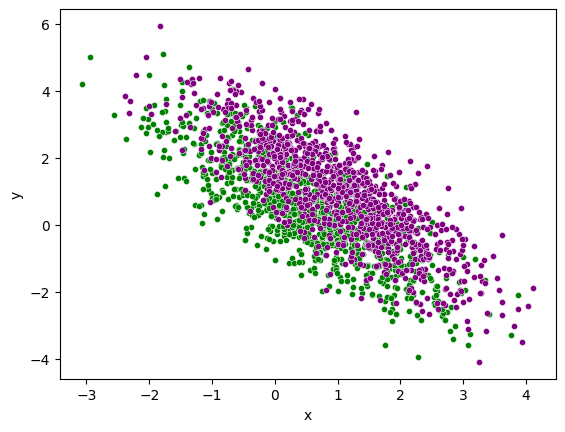

In [49]:
sns.scatterplot(x=xsample1, y=ysample1, color="green", s=20)
sns.scatterplot(x=xsample2, y=ysample2, color="purple", s=20)
plt.ylabel('y')
plt.xlabel('x')

#c

In [50]:
fraction = 0.25

y = np.array([1]*n + [2]*n)  # etiqueta

train, test, y_train, y_test = train_test_split(sample, y, test_size=fraction)

ntrain = len(y_train)
print(f'El tamañano de la muestra para entrenamiento es {train.shape}, por ende el tamaño del conjunto de sus etiquetas es {ntrain}')

ntest  = len(y_test)
print(f'El tamañano de la muestra para testeo es {test.shape}, por ende el tamaño del conjunto de sus etiquetas es {ntest}')

El tamañano de la muestra para entrenamiento es (1500, 2), por ende el tamaño del conjunto de sus etiquetas es 1500
El tamañano de la muestra para testeo es (500, 2), por ende el tamaño del conjunto de sus etiquetas es 500


#d

In [51]:
train1 = np.array([train[i] for i in range(len(train)) if y_train[i] == 1])
train2 = np.array([train[i] for i in range(len(train)) if y_train[i] == 2])

mean1 = np.mean(train1, axis=0)
mean2 = np.mean(train2, axis=0)

sigma1 = np.cov(train1, rowvar=False)
sigma2 = np.cov(train2, rowvar=False)

print('Media y varianza muestral de la categoria 1:')
print(f'Media : {mean1}')
print('Varianza :')
print(sigma1)
print('----------------------------------------------')
print('Media y varianza muestral de la categoria 2:')
print(f'Media : {mean2}')
print('Varianza :')
print(sigma2)
print('----------------------------------------------')

fraction_train1 = len(train1)/len(y_train)
fraction_train2 = len(train2)/len(y_train)

print(f'Fracción muestral de la categoria 1 : {fraction_train1}')
print(f'Fracción muestral de la categoria 2 : {fraction_train2}')

Media y varianza muestral de la categoria 1:
Media : [0.50332019 0.52065524]
Varianza :
[[ 1.22731786 -1.33332987]
 [-1.33332987  2.32031202]]
----------------------------------------------
Media y varianza muestral de la categoria 2:
Media : [0.98394042 0.97505243]
Varianza :
[[ 1.24882978 -1.35256758]
 [-1.35256758  2.22502509]]
----------------------------------------------
Fracción muestral de la categoria 1 : 0.51
Fracción muestral de la categoria 2 : 0.49


#e

In [52]:
ntrain1 = len(y_train[y_train == 1])
ntrain2 = len(y_train[y_train == 2])

p1 = ntrain1 / len(y_train)
p2 = ntrain2 / len(y_train)

sigma1inv = np.linalg.inv(sigma1)
sigma2inv = np.linalg.inv(sigma2)
sigma1invT = sigma1inv.T
sigma2invT = sigma2inv.T
lnsigma1det = np.log(np.linalg.det(sigma1))
lnsigma2det = np.log(np.linalg.det(sigma2))
lnp1 = np.log(p1)
lnp2 = np.log(p2)

def g1(x):
    return -(1/2) * x @ sigma1inv @ x + mean1 @ sigma1invT @ x - (1/2) * mean1 @ sigma1inv @ mean1 - (1/2) * lnsigma1det + lnp1

def g2(x):
    return -(1/2) * x @ sigma2inv @ x + mean2 @ sigma2invT @ x - (1/2) * mean2 @ sigma2inv @ mean2 - (1/2) * lnsigma2det + lnp2

En la celda de arriba supongo que desconozco con exactitud la distribución de probabilidad de los datos y la cantidad que hay de cada clase, ya que la consigna dice que usemos las fórmulas de la sección 2.6.3 donde se supone que las matrices de covarianza son distintas, a pesar de que los datos hayan sido generados con la misma matriz C. Por lo que no trabajé con la fórmula para el discriminante de la sección 2.6.2, la cual es más simple al suponer las matrices de covarianza iguales. Por esta razón, también uso las medias y matrices de covarianza muestrales en lugar de las medias y matrices de covarianza con las que generé los datos, y no desprecio las probabilidades a priori de tener un dato de la categoria 1 o 2 a pesar de haber generado la misma cantidad de datos de ambas categorias.

In [53]:
def classifier(x):
  if g1(x) > g2(x):
      return 1
  else:
      return 2

#f

In [54]:
predictions = []

for i in range(len(y_test)):
    predictions.append(classifier(test[i]))

predictions = np.array(predictions)

#g

In [55]:
aciertos = predictions == y_test

n_aciertos = sum(aciertos)
print(f'El número de errores cometidos es : {ntest - n_aciertos} (Sobre 500 clasificaciones)')

p = 1 - n_aciertos / ntest # fraction of error
print(f'La proporción de errores cometidos es {p}')

El número de errores cometidos es : 139 (Sobre 500 clasificaciones)
La proporción de errores cometidos es 0.278


#h

In [56]:
z = 1.98  #95%
num = sqrt(p * (1 - p) / ntest + (z / (2 * ntest))**2)
den = 1 + z**2 / n
sd = z * num / den
print(f'El intervalo de confianza al 95% es : [{p-sd} , {p+sd}]')


El intervalo de confianza al 95% es : [0.23829160939708663 , 0.31770839060291345]
